## Input and Output Files with Code Interpreter
CsvVisualizer demonstrates the creation and execution of an assistant using that receives a file of data as input and uses code interpreter to produce a chart image as output

## First steps
- First, download AntRunLib from Nuget
- At least once, set up the environment using **[0-AI-settings](0-AI-settings.ipynb)**

In [1]:
#r "nuget: AntRunnerLib, 0.8.6"

using AntRunnerLib;
using AntRunnerLib.Identity;
using static AntRunnerLib.ClientUtility;
using System.IO;

#!import config/Settings.cs 

var envVariables = Settings.GetEnvironmentVariables();
foreach (var kvp in envVariables)
{
    Environment.SetEnvironmentVariable(kvp.Key, kvp.Value);
}

var config = AzureOpenAiConfigFactory.Get();
var client = GetOpenAiClient(config);


Installed Packages AntRunnerLib, 0.8.6

## Ensure the CsvVisualizer assistant exists
The definition of this assistant is located in the ".\AssistantDefinitions\CsvVisualizer" folder

".\AssistantDefinitions\" is a default path. You can override it by setting the **ASSISTANTS_BASE_FOLDER_PATH** environment variable.

"CsvVisualizer" contains the following files:
```
│   manifest.json - The assistant definition
│   center0_height0.5_scale1.csv - A test file used in this notebook attached to the message
```

### Explanation
`AssistantUtility.Create` will create the assistant.

In [2]:
var assistantId = await AssistantUtility.Create("CsvVisualizer", config);
Console.WriteLine(assistantId)

asst_9lvi5959AbXWAlQsQFx0Jzlc


## Run the Assistant

`output.Dialog` shows the conversation.

In [11]:
var assistantRunOptions = new AssistantRunOptions() {
    AssistantName = "CsvVisualizer",
    Instructions = "Create a chart of the data in this file for me to download.",
};

assistantRunOptions.Files = new();
var resourceFile = new ResourceFile(){
    Path = @".\AssistantDefinitions\CsvVisualizer\center0_height0.5_scale1.csv",
    ResourceType = ResourceType.CodeInterpreterToolResource
};
assistantRunOptions.Files.Add(resourceFile);

var output = await AntRunnerLib.AssistantRunner.RunThread(assistantRunOptions, config);
output.Dialog.DisplayAs("text/markdown");


User: Create a chart of the data in this file for me to download.

Assistant: Let's first load and inspect the contents of the uploaded file to understand its structure and the data it contains. Once we have a clear understanding of the data, we can proceed to create a chart based on the data.

I ran this code:
```
import pandas as pd

# Load the uploaded file
file_path = '/mnt/data/assistant-5dX428qZ9QL2ZbSQxU4oMLXc'
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure
data.head()
```

It appears that there was an issue determining the file format. To resolve this, let's try specifying the engine manually. Additionally, it could be that the file is not an Excel file. Let's first check the file extension to confirm the file type.

I ran this code:
```
import os

# Get the file extension
file_extension = os.path.splitext(file_path)[1]
file_extension
```

It seems that the file does not have an extension. This makes it difficult to determine the file type. Let's proceed by trying to read the file using different methods to identify its format.

We'll start by attempting to read the file as a CSV, since CSV is a common format. If that doesn't work, we'll try other formats.

I ran this code:
```
# Attempt to read the file as a CSV
try:
    data = pd.read_csv(file_path)
    read_success = True
except Exception as e:
    read_success = False
    error_message = str(e)

read_success, error_message
```

It seems there was an issue with the code. Let's fix the variable name issue and try reading the file as a CSV again.

I ran this code:
```
# Attempt to read the file as a CSV
try:
    data = pd.read_csv(file_path)
    read_success = True
    error_message = ""
except Exception as e:
    read_success = False
    error_message = str(e)

read_success, error_message
```

The file was successfully read as a CSV. Let's inspect the first few rows of the data to understand its structure.

I ran this code:
```
# Display the first few rows of the data to understand its structure
data.head()
```

The data consists of two columns: `Item` and `Frequency`. We can now create a chart based on this data. Let's create a bar chart that shows the frequency of each item.

I'll generate the chart and provide you with the option to download it.

I ran this code:
```
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(data['Item'], data['Frequency'], color='skyblue')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Frequency of Items')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as an image file
chart_path = '/mnt/data/item_frequency_chart.png'
plt.savefig(chart_path)

# Show the plot
plt.show()

# Provide the path to the saved chart
chart_path
```

The chart has been created successfully. You can download it using the following link:

[Download Chart](sandbox:/mnt/data/item_frequency_chart.png)


In [12]:
output.LastMessage.DisplayAs("text/markdown");
string filePath = "";
// Download files specified in FilePathAnnotation
foreach (var annotation in output.Annotations)
{
    if (annotation.Type == "file_path")
    {
        var fileName = await annotation.GetFileName(config);

        filePath = Path.Combine(@".\", fileName);
        await annotation.DownloadFile(filePath, config);
        break;
    }
}

The chart has been created successfully. You can download it using the following link:

[Download Chart](sandbox:/mnt/data/item_frequency_chart.png)

.\item_frequency_chart.png



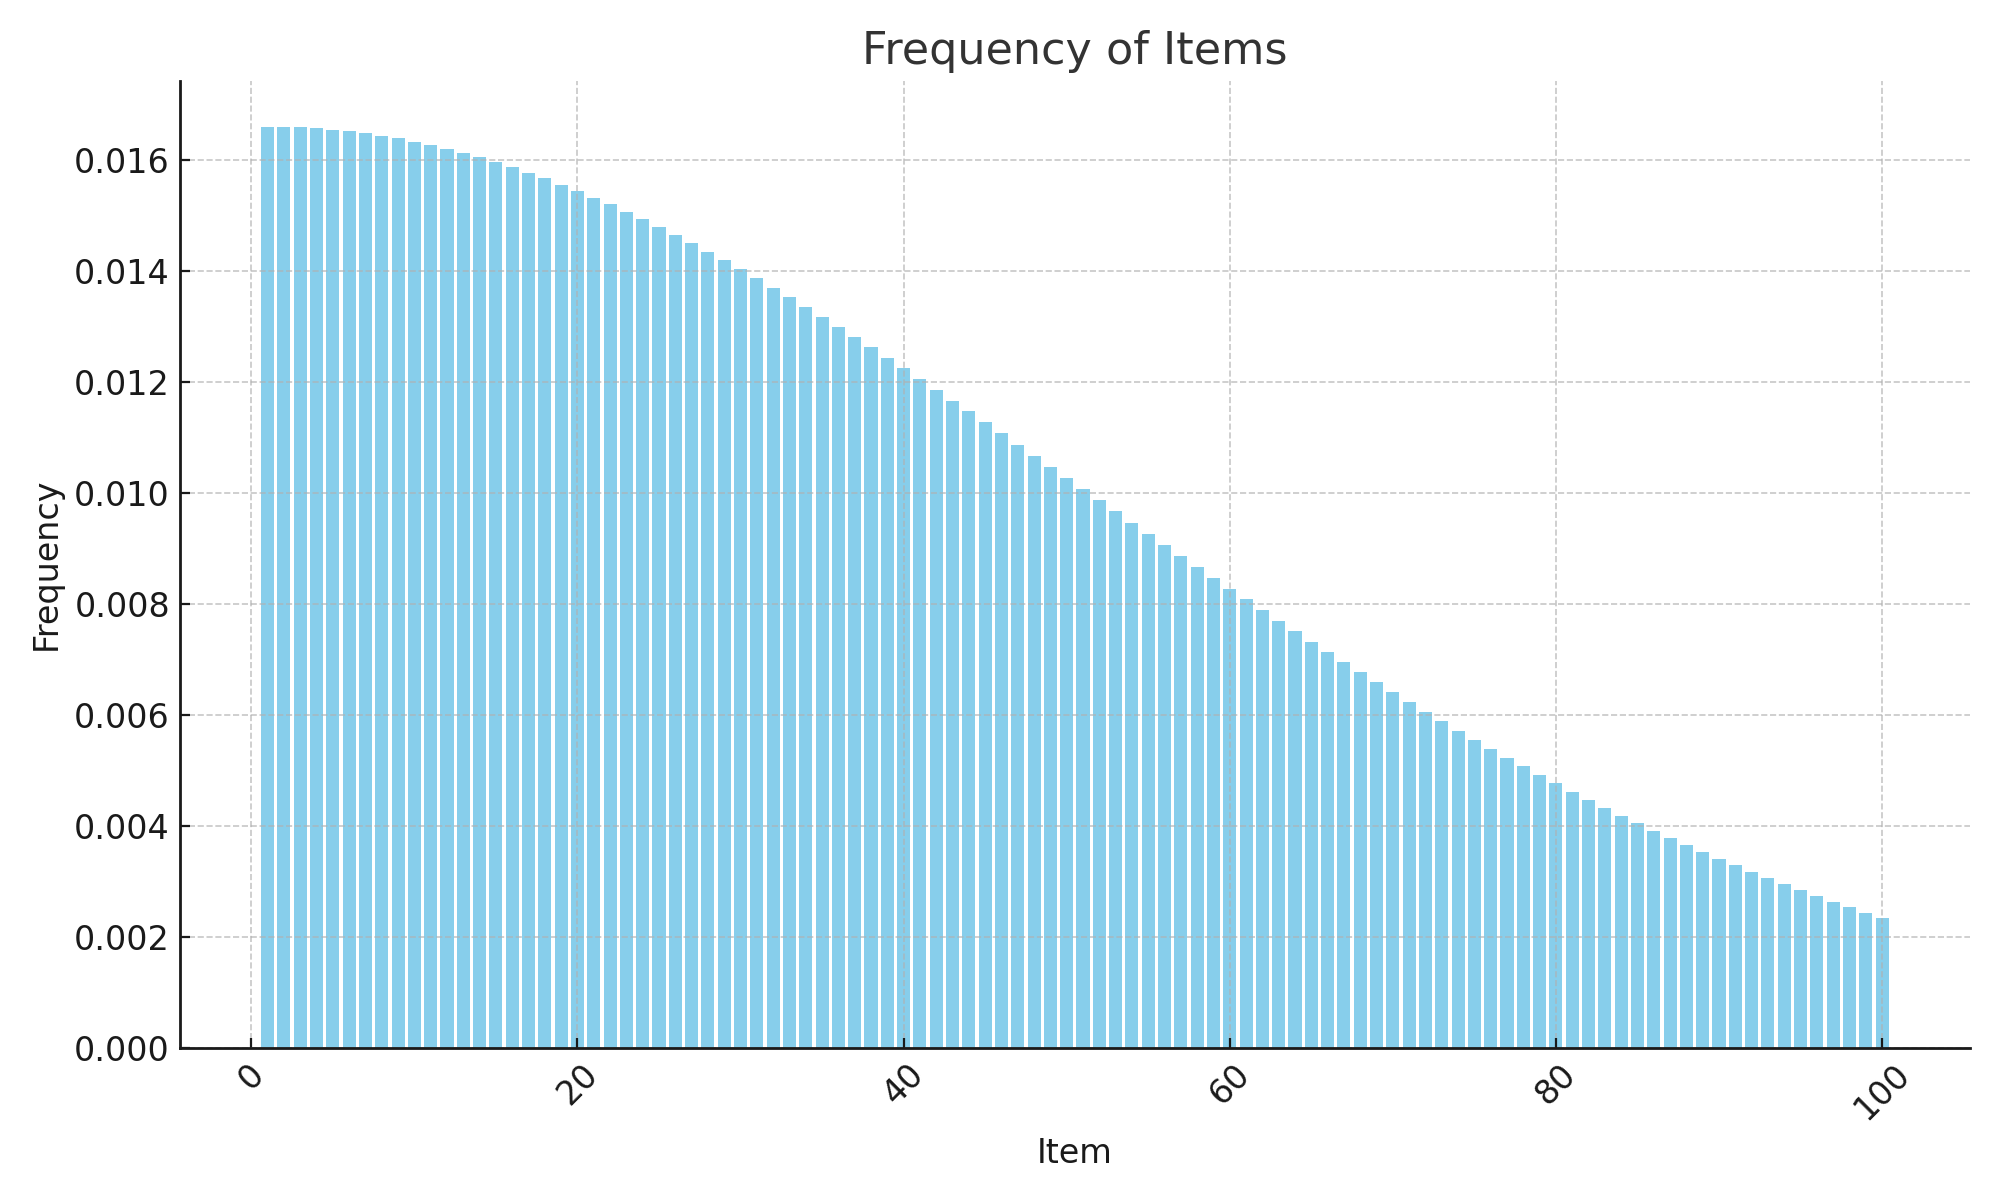

In [13]:
using System.IO;
using Microsoft.DotNet.Interactive.Formatting;
using static Microsoft.DotNet.Interactive.Formatting.PocketViewTags;

Console.WriteLine(filePath);
var imageBytes = File.ReadAllBytes(filePath);

// Convert the image to a base64 string
var base64Image = Convert.ToBase64String(imageBytes);

var htmlImage = img[src: $"data:image/png;base64,{base64Image}", alt: "Image"]();

// Use the display function to render the HTML
display(htmlImage);

## Annotations

In [14]:
Console.WriteLine(JsonSerializer.Serialize(output.Annotations, new JsonSerializerOptions() { WriteIndented = true }));

[
  {
    "type": "file_path",
    "text": "sandbox:/mnt/data/item_frequency_chart.png",
    "start_index": 105,
    "end_index": 147,
    "file_citation": null,
    "file_path": {
      "file_id": "assistant-oybqy26mMiC26aHqacb1LrX0"
    }
  }
]


## Clean Up

In [15]:
await client.DeleteFile(output.Annotations[0].FilePathAnnotation.FileId);

var assistant = (await client.AssistantList())?.Data?.FirstOrDefault(o => o.Name == "CsvVisualizer");

if(assistant != null) {
    await client.AssistantDelete(assistant.Id);
    Console.WriteLine("Deleted assistant");
}
else
{
    Console.WriteLine("Didn't find MsGraphUserProfile");
}

Deleted assistant
